In [21]:
import sys
sys.path.insert(0, '/home/emmanuel/code/kernellib')

In [88]:
import numpy as np
from kernellib.gpr import fit_gp
from sklearn.datasets import load_boston
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


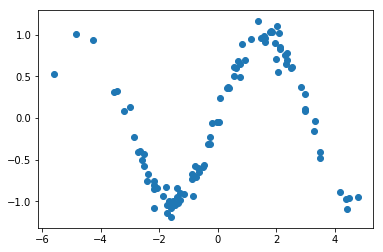

In [120]:
seed = 123
rng = np.random.RandomState(seed)
n_train, n_test = 100, 500
d_dimensions = 1
noise = 0.1

xtrain = 2 * rng.randn(n_train, d_dimensions)
ytrain = np.sin(xtrain) + noise * rng.randn(n_train, d_dimensions)

xplot = np.linspace(xtrain.min(), xtrain.max(), n_test)[:, np.newaxis]
ytest = np.sin(xtest)


fig, ax = plt.subplots()

ax.scatter(xtrain, ytrain)

plt.show()

## Kernel Ridge Regression (ARD Kernel)

In [255]:
param_grid = {
    'alpha': [1e1, 1e0, 1e-1, 1e-2, 1e-3],
    'gamma': np.logspace(-2, 2,10)
}

grid_clf = GridSearchCV(KernelRidge(kernel='rbf'), param_grid=param_grid, n_jobs=10)
grid_clf.fit(xtrain, ytrain)
krr_model = grid_clf.best_estimator_

In [256]:
print(krr_model)

KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.21544346900318834,
      kernel='rbf', kernel_params=None)


In [257]:
krr_model = KRR(kernel='rbf', alpha=alpha, gamma=gamma)
krr_model.fit(xtrain, ytrain)
y_pred = krr_model.predict(xplot)

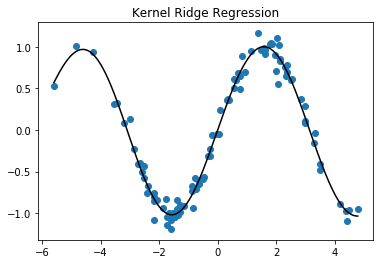

In [274]:
fig, ax = plt.subplots()

ax.scatter(xtrain, ytrain)
ax.plot(xplot, y_pred, color='k')
ax.set_title('Kernel Ridge Regression')
plt.show()

### Derivative and Sensitivity

In [259]:
from kernellib.derivatives import RBFDerivative

In [260]:
der_model = RBFDerivative(krr_model)

# Calculate the Derivative (M x D)
der = der_model.derivative(xplot)
print('Derivative shape:', der.shape)

# Calculate the Full Derivative (N x M x D)
full_der = der_model.derivative(xplot, full=True)
print('Full Derivative shape:', der.shape)


# Per Point Sensitivity
per_point_sens = der_model.point_sensitivity(xplot, sample='point')
print('Per Point Sens shape:', per_point_sens.shape)

# Per Dimension Sensitivity
per_dim_sens = der_model.point_sensitivity(xplot, sample='dim')
print('Per Dim Sens:', per_dim_sens)

# Total Senstivity
sens = der_model.sensitivity(xplot)
print('Total Sens: {:.3f}'.format(sens))

Derivative shape: (500, 1)
Full Derivative shape: (500, 1)
Per Point Sens shape: (500,)
Per Dim Sens: [0.48306066]
Total Sens: 0.483


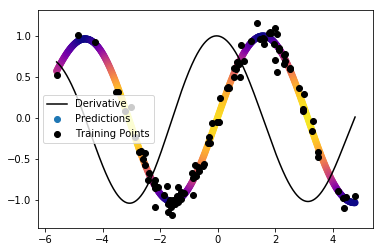

In [261]:
fig, ax = plt.subplots()

ax.scatter(xplot, y_pred, c=per_point_sens[:, np.newaxis], 
           label='Predictions', cmap=plt.cm.plasma)
ax.scatter(xtrain, ytrain, color='k', label='Training Points')

ax.plot(xplot, der, color='k', label='Derivative')

ax.legend()
ax.set_title('Kernel Ridge Regression')
plt.show()

## Gaussian Processes (ARD Kernel)

In [264]:
from sklearn.gaussian_process.kernels import (ConstantKernel as C,
                                              RBF, WhiteKernel)
from sklearn.gaussian_process import GaussianProcessRegressor

In [271]:
kernel = C() * RBF() + WhiteKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, random_state=seed)

gp_model.fit(xtrain, ytrain);
y_pred = gp_model.predict(xplot)

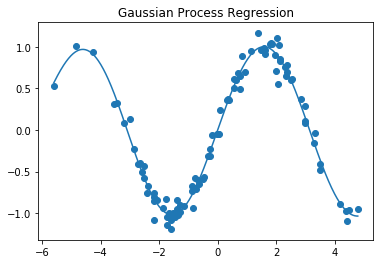

In [301]:
fig, ax = plt.subplots()

ax.scatter(xtrain, ytrain)
ax.plot(xplot, y_pred)
ax.set_title('Gaussian Process Regression')

plt.show()

## Derivative and Sensitivity

In [284]:
from kernellib.derivatives import ARDDerivative

In [285]:
der_model = ARDDerivative(gp_model)

# Calculate the Derivative (M x D)
der = der_model.derivative(xplot)
print('Derivative shape:', der.shape)

# # Calculate the Full Derivative (N x M x D)
# full_der = der_model.derivative(xplot, full=True)
# print('Full Derivative shape:', der.shape)


# Per Point Sensitivity
per_point_sens = der_model.point_sensitivity(xplot, sample='point')
print('Per Point Sens shape:', per_point_sens.shape)

# Per Dimension Sensitivity
per_dim_sens = der_model.point_sensitivity(xplot, sample='dim')
print('Per Dim Sens:', per_dim_sens)

# Total Senstivity
sens = der_model.sensitivity(xplot)
print('Total Sens: {:.3f}'.format(sens))

Derivative shape: (500, 1)
Per Point Sens shape: (500,)
Per Dim Sens: [0.48412956]
Total Sens: 0.484


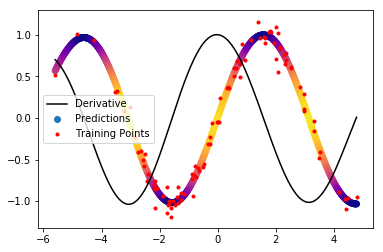

In [300]:
fig, ax = plt.subplots()

ax.scatter(xplot, y_pred, c=per_point_sens[:, np.newaxis], 
           label='Predictions', cmap=plt.cm.plasma)
ax.scatter(xtrain, ytrain, color='r', s=9.0, label='Training Points')

ax.plot(xplot, der, color='k', label='Derivative')

ax.legend()
ax.set_title('Gaussian Processes Regression')

plt.show()